Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```

In [1]:
import pandas as pd

In [14]:
turmas_total = pd.read_csv('turmas-2017.1.csv', sep=";")
turmas_total.head()

turmas_imd  = turmas_total[turmas_total['codigo'].str.contains("IMD")]

turmas_imd.head()

,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
4880,57597051,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,5e7d1e765af746bb22d3eb10f26919b8,NaN,GRADUAÇÃO,2017,1,83.0,B203 - CIVT,...,f,1,2017-07-08 12:27:45.88,f,209.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
4881,57597051,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,bb54c6e6fdf98c62c5e3ecad295d6347,NaN,GRADUAÇÃO,2017,1,83.0,B203 - CIVT,...,f,1,2017-07-08 12:27:45.88,f,209.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
4888,57597055,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,5e7d1e765af746bb22d3eb10f26919b8,NaN,GRADUAÇÃO,2017,1,81.0,B204 - CIVT,...,f,1,2017-07-04 20:15:57.185,f,220.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
4889,57597055,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,8733dedf2a1fc8440eb8f8ca21aa4d06,NaN,GRADUAÇÃO,2017,1,81.0,B204 - CIVT,...,f,1,2017-07-04 20:15:57.185,f,220.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
4891,57597057,IMD0019,RESOLUCAO DE PROBLEMAS MATEMATICOS PARA TI,bb54c6e6fdf98c62c5e3ecad295d6347,NaN,GRADUAÇÃO,2017,1,89.0,B204,...,f,1,2017-07-08 12:45:27.759,f,204.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN


In [17]:
turmas_consolidadas = turmas_imd[turmas_imd["situacao_turma"].str.contains("CONSOLIDADA")]

print("Turmas consolidadas:",turmas_consolidadas.shape[0])

Turmas consolidadas: 103


In [18]:
turmas_consolidadas.pivot_table(index="nome_ascii", values="situacao_turma", aggfunc='count')

nome_ascii
ADMINISTRACAO DE SISTEMAS OPERACIONAIS PARA REDES                                         1
ANALISE ESTATISTICA PARA BIG DATA                                                         1
APRENDIZAGEM DE MAQUINA PARA BIG DATA                                                     1
ARMAZENAMENTO DE BIG DATA                                                                 1
AVALIACAO DA INTERACAO HUMANO-COMPUTADOR                                                  1
CALCULO DIFERENCIAL E INTEGRAL I                                                          3
DESENVOLVIMENTO DE PROJETOS DE REDES DE COMPUTADORES                                      1
DESENVOLVIMENTO DE SISTEMAS WEB II                                                        1
DESIGN DA INTERACAO HUMANO-COMPUTADOR                                                     1
DESIGN DE SOFTWARE I                                                                      1
EDUCACAO A DISTANCIA                                                 

2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 

In [41]:
turmas_prob = turmas_imd[turmas_imd["codigo"].str.contains("IMD0033")]


codigo_turma = list(turmas_prob['id_turma'])

codigo_turma

[57597912, 57597913]

In [49]:
alunos_total = pd.read_csv('matricula-componente-20171.csv', sep=";")

In [54]:
alunos_prob1 = alunos_total[alunos_total["id_turma"] == codigo_turma[0]]
alunos_prob1 = alunos_prob1.dropna()
alunos_prob2 = alunos_total[alunos_total["id_turma"] == codigo_turma[1]]
alunos_prob2 = alunos_prob2.dropna()
alunos_prob1.columns

Index(['id_turma', 'id_discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'situacao'],
      dtype='object')

In [57]:
# We can test how skewed a distribution is using the skew function.
# A positive value means positive skew, 
# a negative value means negative skew, and close to zero means no skew.
from scipy.stats import skew

skewness = skew(alunos_prob1['nota'].value_counts())
skewness

4.392894113344194

In [58]:
skewness = skew(alunos_prob2['nota'].value_counts())
skewness

3.9785262183599515

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


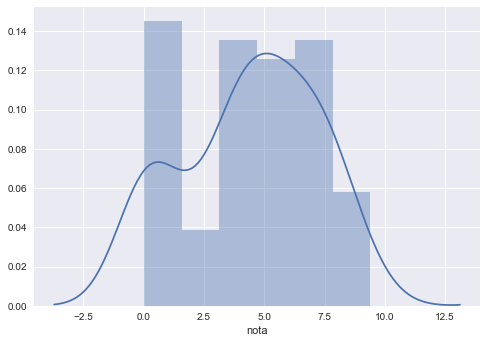

In [63]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns

#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")

# plot a univariate distribution of observations.
sns.distplot(alunos_prob1["nota"])
plt.show()

3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 

4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 